In [18]:
#Importing required libraries

import pandas as pd
import statistics as stats
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.graph_objs as go
from scipy.stats import pearsonr
from scipy.stats import spearmanr
import numpy as np
from numpy import mean
from numpy import std
import seaborn as sns
from numpy import cov

In [19]:
#Reading the dataframe from excel 
df = pd.read_csv("data_pred.csv")


Defining cronbach's alpha

In [21]:
def cronbach_alpha(df):
    # Transform the df into a correlation matrix
    df_corr = df.corr(method ='pearson')
    
    # Calculating the value of N- The number of variables equals the number of columns in the df
    N = df.shape[1]
    # Calculating the mean correlation of df
    rs = np.array([])
    for i, col in enumerate(df_corr.columns):
        sum_ = df_corr[col][i+1:].values
        rs = np.append(sum_, rs)
    mean_corr = np.mean(rs)
    
   # Using the formula to calculate Cronbach's Alpha 
    cronbach_alpha = (N * mean_corr) / (1 + (N - 1) * mean_corr)
    return round(cronbach_alpha,2)
cronbach_alpha(df)


0.87

# Regression analysis
The goal of regression analysis is to uncover trends and patterns by estimating how one or more factors may influence the dependent variable. This is very important for projecting future trends and generating forecasts.

In [ ]:
#"MEQ_score_value" 'Global_PSQI' 'PANAS_Score_negative' 'PANAS_Score_positive' OCD_Score_value  'sleep_latency' 'sleep_disturbance' 'sleep_efficiency_percent' 'sleep_dysfunction' PSQI6- sleep medication PSQI4s- sleep duration
a = df['OCD_Score_value']
b = df["Global_PSQI"]
covariance = cov(a, b)

print('OCD_Score_value: mean=%.3f stdv=%.3f' % (mean(a), std(a)))
print('Global_PSQI: mean=%.3f stdv=%.3f' % (mean(b), std(b)))


After the mapping of the dataset, the next step is to find the correlation between the OCD- Sleep variables. The Pearson correlation coefficient characterises the strength of the linear link between two data samples.

In [ ]:
pearsonr(a, b)

In [ ]:
import numpy as np, pandas as pd; np.random.seed(0)
import seaborn as sns; sns.set(style="white", color_codes=True)
plt.scatter(a, b)
plt.rcParams.update({'figure.figsize':(10,8), 'figure.dpi':100})
plt.scatter(a, b, c=b)
plt.colorbar()
plt.xlabel('OCD Score')
plt.ylabel('Global PSQI function')
plt.show()
sns.lmplot(x='OCD_Score_value', y='Global_PSQI', data=df, line_kws={'color': 'magenta'})
plt.xlabel('OCD Score')
plt.ylabel('Global PSQI function')

Text(0, 0.5, 'Number of participants')

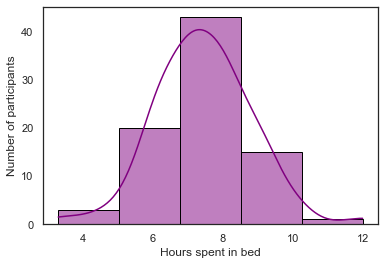

In [4]:
#Histograms for hours spent in bed
sns.set(style="white", color_codes=True)
sns.histplot(data=df, x="PSQIhoursinbed", color= 'purple',kde=True,bins=5, edgecolor="black")
plt.xlabel('Hours spent in bed')
plt.ylabel('Number of participants')

Text(0, 0.5, 'Number of participants')

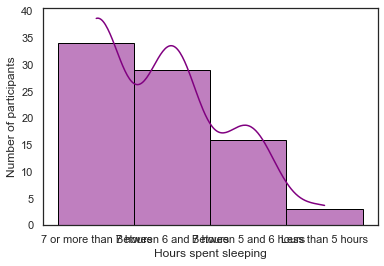

In [5]:
#Histograms for hours spent sleeping
sns.set(style="white", color_codes=True)
sns.histplot(data=df, x="PSQI4", color= 'purple',kde=True,bins=5, edgecolor="black")
plt.xlabel('Hours spent sleeping')
plt.ylabel('Number of participants')

Text(0, 0.5, 'Number of participants')

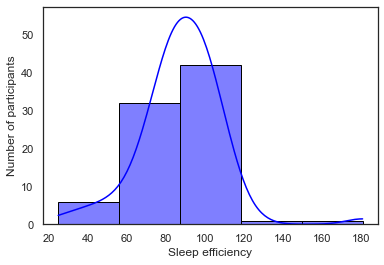

In [6]:
#Histograms for sleep efficiency
sns.set(style="white", color_codes=True)
sns.histplot(data=df, x="sleep_efficiency", color= 'blue',kde=True,bins=5, edgecolor="black")
plt.xlabel('Sleep efficiency')
plt.ylabel('Number of participants')

Text(0, 0.5, 'Number of participants')

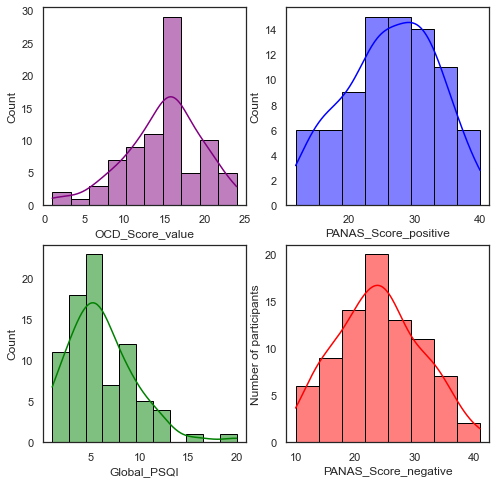

In [7]:
#Histograms for OCD
fig, axs = plt.subplots(2, 2, figsize=(8, 8))
sns.set(style="white", color_codes=True)
sns.histplot(data=df, x="OCD_Score_value", color= 'purple',kde=True, edgecolor="black",ax=axs[0, 0])
sns.histplot(data=df, x="PANAS_Score_positive", color= 'blue',kde=True, edgecolor="black",ax=axs[0, 1])
sns.histplot(data=df, x="PANAS_Score_negative", color= 'red',kde=True, edgecolor="black",ax=axs[1, 1])
sns.histplot(data=df, x="Global_PSQI", color= 'green',kde=True, edgecolor="black",ax=axs[1, 0])
plt.ylabel('Number of participants')

Text(0, 0.5, 'Number of participants')

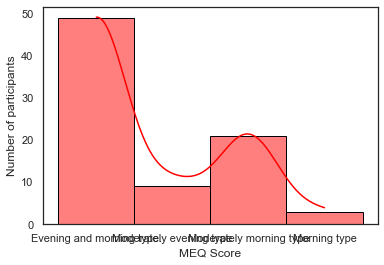

In [8]:
#Histograms for MEQ
sns.set(style="white", color_codes=True)
sns.histplot(data=df, x="MEQscore", color= 'red',kde=True, edgecolor="black")
plt.xlabel('MEQ Score')
plt.ylabel('Number of participants')

Estimated coefficients:
b_0 = 0.48737176795247716            
b_1 = 0.3765672805807193


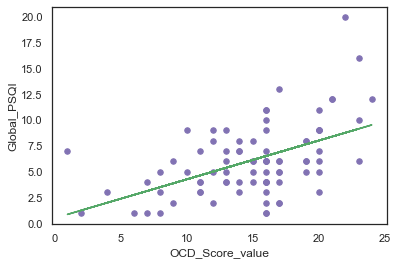

0     8.018717
1     6.512448
2     4.629612
3     4.253045
4     6.889016
        ...   
77    8.395285
78    6.889016
79    7.642150
80    6.512448
81    8.018717
Name: OCD_Score_value, Length: 82, dtype: float64


In [9]:
import numpy as np
import matplotlib.pyplot as plt
  
def estimate_coef(x, y):
    # number of observations/points
    n = np.size(x)
  
    # mean of x and y vector
    m_x = np.mean(x)
    m_y = np.mean(y)
  
    # calculating cross-deviation and deviation about x
    SS_xy = np.sum(y*x) - n*m_y*m_x
    SS_xx = np.sum(x*x) - n*m_x*m_x
  
    # calculating regression coefficients
    b_1 = SS_xy / SS_xx
    b_0 = m_y - b_1*m_x
  
    return (b_0, b_1)
  
def plot_regression_line(x, y, b):
    # plotting the actual points as scatter plot
    plt.scatter(x, y, color = "m",
               marker = "o", s = 30)
  
    # predicted response vector
    y_pred = b[0] + b[1]*x
  
    # plotting the regression line
    plt.plot(x, y_pred, color = "g")
  
    # putting labels
    plt.xlabel('OCD_Score_value')
    plt.ylabel('Global_PSQI')
  
    # function to show plot
    plt.show()
    print (y_pred)

def main():
    # observations / data
    y = df["Global_PSQI"]
    x = df["OCD_Score_value"]
  
    # estimating coefficients
    b = estimate_coef(x, y)
    print("Estimated coefficients:\nb_0 = {}  \
          \nb_1 = {}".format(b[0], b[1]))
  
    # plotting regression line
    plot_regression_line(x, y, b)
if __name__ == "__main__":
    main()

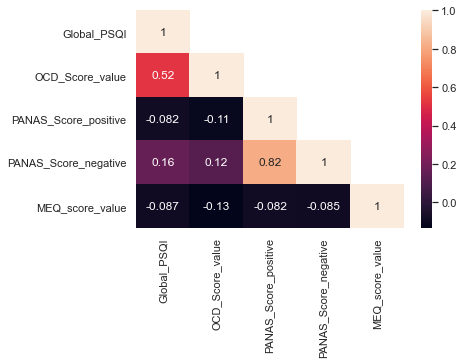

In [10]:
df_1 = pd.read_csv("cronbach.csv")
df_corr = df_1.corr()
matrix = np.triu(df_corr)
np.fill_diagonal(matrix, False)
sns.heatmap(df_corr, annot=True, mask=matrix)
plt.show() 



In [11]:

df = pd.read_csv("data_reg.csv")

X = df.drop(['OCD_Score_value','PANAS_Score_positive','PANAS_Score_negative'], axis=1)

Simple Linear Regression

In [12]:
X = df['Global_PSQI']
y = df['OCD_Score_value']

In [13]:
# Splitting the varaibles as training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, 
                                                    test_size = 0.2, random_state = 100)

In [14]:
X_train
y_train

23    13
45    16
55     8
28    14
74    20
17    11
70    16
21    18
37    18
0     17
18    15
12    13
6     11
71    17
39    14
63    21
38    10
46    14
69     6
65    13
47     9
30    14
54    16
59     8
42    16
72     7
49    22
7     18
3     17
68    16
51    13
62    18
19     3
13    16
1     15
31    12
4      9
44     8
27    23
2     10
22    15
29    15
9     18
16    16
58    13
60    22
43    12
36     7
15    18
73    15
34    16
14    15
66    14
53    11
52     2
10    12
48     1
67    16
24    16
8     10
Name: OCD_Score_value, dtype: int64

In [15]:
import statsmodels.api as sm

# Adding a constant to get an intercept
X_train_sm = sm.add_constant(X_train)

In [16]:
# Fitting the resgression line using 'OLS'
lr = sm.OLS(y_train, X_train_sm).fit()

# Printing the parameters
lr.params

const          9.570331
Global_PSQI    0.709508
dtype: float64

In [17]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        OCD_Score_value   R-squared:                       0.312
Model:                            OLS   Adj. R-squared:                  0.300
Method:                 Least Squares   F-statistic:                     26.33
Date:                Wed, 07 Sep 2022   Prob (F-statistic):           3.49e-06
Time:                        16:09:58   Log-Likelihood:                -166.22
No. Observations:                  60   AIC:                             336.4
Df Residuals:                      58   BIC:                             340.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           9.5703      0.943     10.148      0.000       7.682      11.458
Global_PSQI     0.7095      0.138      5.131      0.000       0.433       0.986
==============================================================================
Omnibus:                        9.368   Durbin-Watson:                   1.970
Prob(Omnibus):                  0.009   Jarque-Bera (JB):                9.901
Skew:                          -0.697   Prob(JB):                      0.00708
Kurtosis:                       4.420   Cond. No.                         12.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
y = 9.273182 + 0.719200 * df['Global_PSQI']

In [ ]:
# Visualizing the regression line
plt.scatter(X_train, y_train)
plt.plot(X_train, -0.402916 + 0.466503*X_train, 'r')
plt.show()

In [ ]:
# Predicting y_value using traingn data of X
y_train_pred = lr.predict(X_train_sm)

# Creating residuals from the y_train data and predicted y_data
res = (y_train - y_train_pred)

In [ ]:
# Plotting the histogram using the residual values
fig = plt.figure()
sns.distplot(res, bins = 15)
plt.title('Error Terms', fontsize = 15)
plt.xlabel('y_train - y_train_pred', fontsize = 15)
plt.show()

In [ ]:
# Looking for any patterns in the residuals
plt.scatter(X_train,res)
plt.show()

In [ ]:
# Adding a constant to X_test
X_test_sm = sm.add_constant(X_test)

# Predicting the y values corresponding to X_test_sm
y_test_pred = lr.predict(X_test_sm)

# Printing the first 15 predicted values
y_test_pred

In [ ]:
# Importing r2_square
from sklearn.metrics import r2_score

# Checking the R-squared value
r_squared = r2_score(y_test, y_test_pred)
r_squared

In [ ]:
# Visualize the line on the test set
plt.scatter(X_test, y_test)
plt.plot(X_test, y_test_pred, 'r')
plt.show()